In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 20
k = 30
x0 = np.array([0, 0])
xn = np.array([20, 20])
r = np.random.uniform(0, 20, (k, 2))
lambda1 = 1
lambda2 = 1
epsilon = 1e-3
num_iterations = 400
x = np.linspace(x0, xn, n+1)

In [3]:
def compute_F(x, r, lambda1, lambda2):
    term1 = sum(1 / (np.linalg.norm(x[i] - r[j])**2 + epsilon) for i in range(1, n) for j in range(k))
    term2 = sum(np.linalg.norm(x[i+1] - x[i])**2 for i in range(n))
    return lambda1 * term1 + lambda2 * term2

In [4]:
def compute_gradient(x, r, lambda1, lambda2):
    grad = np.zeros_like(x)  
    for i in range(1, n):   
        term1_grad = np.zeros(2)
        for j in range(k):
            term1_grad += (x[i] - r[j]) / (np.linalg.norm(x[i] - r[j])**2 + epsilon)**2
        term1_grad *= -2 * lambda1

        term2_grad = np.zeros(2)
        if i > 0:
            term2_grad += 2 * lambda2 * (x[i] - x[i-1])
        if i < n:
            term2_grad += 2 * lambda2 * (x[i] - x[i+1])

        grad[i] = term1_grad + term2_grad
    return grad

In [10]:
def golden_section_search(func, a, b, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    while (b - a) > tol:
        c = b - (b - a) / phi
        d = a + (b - a) / phi
        if func(c) < func(d):
            b = d
        else:
            a = c
    return (b + a) / 2

In [11]:
def gradient_descent_with_line_search(x, r, lambda1, lambda2, num_iterations):
    history = []
    for _ in range(num_iterations):
        grad = compute_gradient(x, r, lambda1, lambda2)
        
        # Funkcja do minimalizacji wzdłuż kierunku przeciwnym do gradientu
        def line_search_func(alpha):
            new_x = x.copy()
            new_x[1:n] = new_x[1:n] - alpha * grad[1:n]
            return compute_F(new_x, r, lambda1, lambda2)
        
        alpha = golden_section_search(line_search_func, 0, 1) 
        
        x[1:n] = x[1:n] - alpha * grad[1:n]
        
        history.append(compute_F(x, r, lambda1, lambda2))
    return x, history

In [12]:
optimal_path, history = gradient_descent_with_line_search(x, r, lambda1, lambda2, num_iterations)

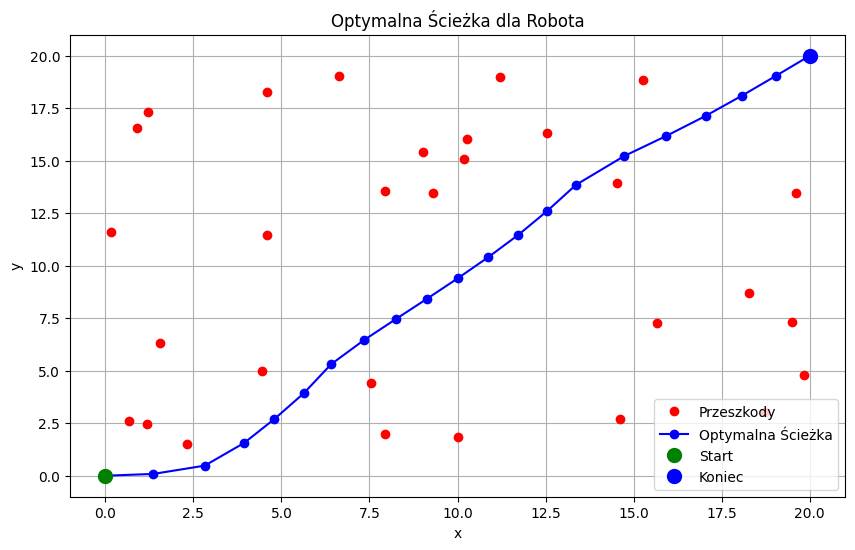

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(r[:, 0], r[:, 1], 'ro', label='Przeszkody')
plt.plot(optimal_path[:, 0], optimal_path[:, 1], 'b-', marker='o', label='Optymalna Ścieżka')
plt.plot(x0[0], x0[1], 'go', markersize=10, label='Start')
plt.plot(xn[0], xn[1], 'bo', markersize=10, label='Koniec')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optymalna Ścieżka dla Robota')
plt.legend()
plt.grid(True)
plt.show()

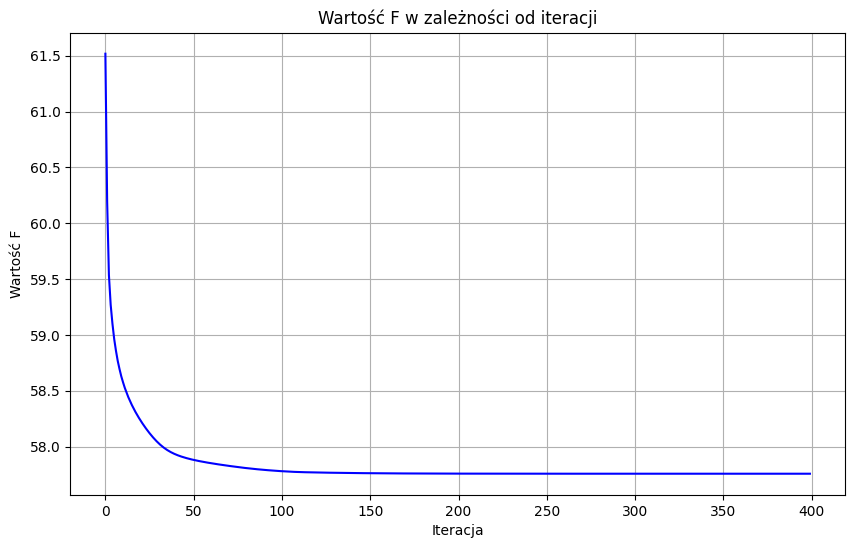

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history, 'b-')
plt.xlabel('Iteracja')
plt.ylabel('Wartość F')
plt.title('Wartość F w zależności od iteracji')
plt.grid(True)
plt.show()